<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Word2vec-실습-with-Gensim,-Tensorflow" data-toc-modified-id="Word2vec-실습-with-Gensim,-Tensorflow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Word2vec 실습 with Gensim, Tensorflow</a></span><ul class="toc-item"><li><span><a href="#예제-데이터" data-toc-modified-id="예제-데이터-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>예제 데이터</a></span></li></ul></li><li><span><a href="#Tensorflow" data-toc-modified-id="Tensorflow-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow</a></span><ul class="toc-item"><li><span><a href="#시각화" data-toc-modified-id="시각화-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>시각화</a></span></li></ul></li><li><span><a href="#Gensim" data-toc-modified-id="Gensim-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gensim</a></span><ul class="toc-item"><li><span><a href="#시각화" data-toc-modified-id="시각화-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>시각화</a></span></li></ul></li><li><span><a href="#실습-데이터" data-toc-modified-id="실습-데이터-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>실습 데이터</a></span><ul class="toc-item"><li><span><a href="#answer" data-toc-modified-id="answer-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>answer</a></span><ul class="toc-item"><li><span><a href="#시각화" data-toc-modified-id="시각화-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>시각화</a></span></li></ul></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix</a></span></li></ul></div>

문서 유사도 측정 (TF-IDF / 워드 임베딩), 시각화(t-sne) --- wiki, 영화 리뷰

## Word2vec 실습 with Gensim, Tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

### 예제 데이터

In [11]:
# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

## Tensorflow

In [4]:
tf.reset_default_graph()


# Word2Vec Parameter
batch_size = 20
embedding_size = 2 #To show 2 dim embedding graph
voc_size = len(word_list)

In [2]:
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # target
        random_labels.append(np.eye(voc_size)[data[i][1]])  # context word

    return random_inputs, random_labels

In [3]:
# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])

In [5]:
# Model
inputs = tf.placeholder(tf.float32, shape=[None, voc_size])
labels = tf.placeholder(tf.float32, shape=[None, voc_size])

# W and WT is not Traspose relationship
W = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
WT = tf.Variable(tf.random_uniform([embedding_size, voc_size], -1.0, 1.0))

hidden_layer = tf.matmul(inputs, W) # [batch_size, embedding_size]
output_layer = tf.matmul(hidden_layer, WT) # [batch_size, voc_size]

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [6]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(5000):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss = sess.run([optimizer, cost], feed_dict={inputs: batch_inputs, labels: batch_labels})

        if (epoch + 1)%1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

        trained_embeddings = W.eval()

Epoch: 1000 cost = 2.352436
Epoch: 2000 cost = 2.276968
Epoch: 3000 cost = 2.220269
Epoch: 4000 cost = 1.941386
Epoch: 5000 cost = 1.922742


### 시각화

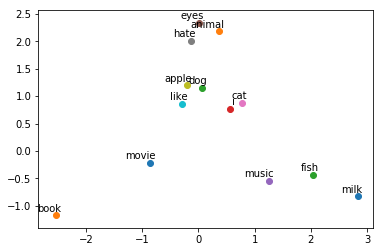

In [7]:
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

## Gensim

In [15]:
from gensim.models import Word2Vec

- list in list 형태로 데이터 학습  
- shift+tab을 누르면 파라미터 정보에 대해 볼 수 있음  
  ex) sg=1 : skip-gram 사용

In [73]:
s=list(map(lambda x: x.split(' '),sentences))

In [74]:
model=Word2Vec(s,sg=1,size=2,min_count=1)

https://radimrehurek.com/gensim/models/word2vec.html 를 참조

- word_vec : 임베딩 벡터 구하기
- similarity : 두 단어의 유사도 계산  
- most_similar : 가장 유사한 단어를 출력

In [80]:
# 각 단어의 임베딩 벡터 구하기

model.wv.word_vec('dog')

array([0.14408784, 0.08694033], dtype=float32)

In [82]:
# 두 단어 사이의 유사도 구하기

model.wv.similarity('dog', 'cat')

0.9658141306538239

In [78]:
# 각 단어와 가장 유사한 단어 구하기

model.wv.similar_by_word('like',)

[('music', 0.6115697622299194),
 ('book', 0.5629396438598633),
 ('cat', 0.20715168118476868),
 ('dog', -0.053542375564575195),
 ('fish', -0.3438749611377716),
 ('animal', -0.5914135575294495),
 ('apple', -0.6067360639572144),
 ('movie', -0.6749720573425293),
 ('i', -0.8024645447731018),
 ('hate', -0.8549919128417969)]

### 시각화

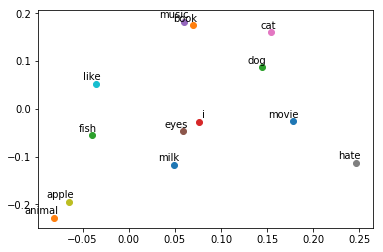

In [76]:
for word in word_list:
    x,y = model.wv.word_vec(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')    

## 실습 데이터

https://korquad.github.io/?fbclid=IwAR2UQrtwjHRjzEJkHyUsdA9e6NP7Bd70PbsEGJd-0NAsTlNRr9JhnDzXgUA

word2vec 모델을 학습시키고, T-sne로 시각화 시키기

- Tip) from sklearn.manifold import TSNE 활용

In [6]:
def json2csv(filename):
    data = pd.read_json(filename)
    contexts = []
    for i in range(data.shape[0]):
        topic = data.iloc[i,1]['paragraphs']
        for sub_para in topic:
            for q_a in sub_para['qas']:
                contexts.append(sub_para['context'])  
                
    df = pd.Series(contexts).drop_duplicates().reset_index(drop=True)
    return df

In [7]:
df=json2csv('nlp_tutorial/data//KorQuAD_v1.0_dev.json')

In [8]:
df.shape[0]

960

In [9]:
df.head()

0    1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률...
1    "내각과 장관들이 소외되고 대통령비서실의 권한이 너무 크다", "행보가 비서 본연의...
2    알렉산더 메이그스 헤이그 2세(영어: Alexander Meigs Haig, Jr....
3    노터데임 대학교에서 2년간 합리적으로 심각한 공부를 한 후 헤이그는 1944년 미국...
4    헤이그는 닉슨 대통령이 그를 사성 장군과 육군 부참모로 진급시킬 때 집중 광선과 논...
dtype: object

### answer

In [10]:
from konlpy.tag import Komoran

ko=Komoran()

In [11]:
def get_nouns(x):
    nouns=ko.nouns(x)
    nouns=[noun for noun in nouns if len(noun)>1]
    return nouns

In [12]:
corpus=list(df.apply(get_nouns))

In [27]:
# modeling
w_model=Word2Vec(corpus,sg=1,size=100,min_count=30, workers=-1)

In [28]:
uniq_words=list(w_model.wv.vocab.keys())

print('unique word 개수 :',len(uniq_words))

unique word 개수 : 433


In [35]:
w_model.wv.most_similar('나폴레옹')

[('세력', 0.2620029151439667),
 ('차이', 0.2365054190158844),
 ('가지', 0.2266274243593216),
 ('헌법', 0.21814650297164917),
 ('지적', 0.19943827390670776),
 ('운동', 0.1962122917175293),
 ('건설', 0.19551216065883636),
 ('자금', 0.19274091720581055),
 ('사용', 0.18963825702667236),
 ('무기', 0.18623533844947815)]

#### 시각화

In [30]:
wv_list=list(map(lambda x: list(w_model.wv.word_vec(x)),uniq_words))

wv_list=np.array(wv_list)

print('word vector shape :',wv_list.shape)

word vector shape : (433, 100)


In [31]:
# Perform the necessary imports
from sklearn.manifold import TSNE

tsne=TSNE(learning_rate=100,)

In [33]:
transformed=tsne.fit_transform(wv_list)

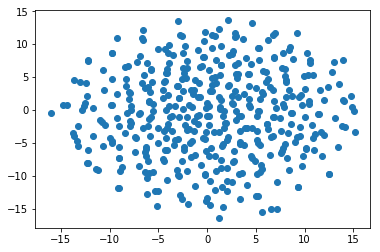

In [34]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)

## Appendix

In [ ]:
def json2csv(filename):
    
    data = pd.read_json(filename)
    
    contexts = []
    questions = []
    answers_text = []
    answers_start = []
    
    for i in range(data.shape[0]):
        topic = data.iloc[i,1]['paragraphs']
        for sub_para in topic:
            for q_a in sub_para['qas']:
                questions.append(q_a['question'])
                answers_start.append(q_a['answers'][0]['answer_start'])
                answers_text.append(q_a['answers'][0]['text'])
                contexts.append(sub_para['context'])  
                
    df = pd.DataFrame({"context":contexts, "question": questions, 
                       "answer_start": answers_start, "text": answers_text})
    
    return df